<a href="https://colab.research.google.com/github/Mutlaq-Alqahtani/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import clear_output

In [2]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK  # Download the csv file.

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 7.50MB/s]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
titanic_data = pd.read_csv('titanic.csv')

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
data_y = titanic_data['Survived']
data_x = titanic_data.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin','Age'])

# Convert 'Embarked' into numeric using one-hot encoding
data_x = pd.get_dummies(data_x, columns=['Embarked'], drop_first=True)

# Convert 'Sex' column to binary numeric values: 0 for 'female', 1 for 'male'
data_x['Sex'] = data_x['Sex'].map({'male': 1, 'female': 0})

In [8]:
data_x.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,3,1,1,0,7.2500,False,True
1,2,1,0,1,0,71.2833,False,False
2,3,3,0,0,0,7.9250,False,True
3,4,1,0,1,0,53.1000,False,True
4,5,3,1,0,0,8.0500,False,True


In [9]:
data_y


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [10]:
# # Split the dataset into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, stratify= data_y, random_state=0)


In [11]:
# Build and train the model

model = LogisticRegression(random_state=0,max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [12]:
# Evaluate the model's performance on the test data

model.score(x_test, y_test)


0.776536312849162

In [13]:
# Generate predictions for the test data

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



The classification report shows that the model has a precision of 0.80 and a recall of 0.85 for class 0, and a precision of 0.74 and a recall of 0.65 for class 1. Overall, the model achieves an accuracy of 0.78, with a macro average F1-score of 0.76 and a weighted average F1-score of 0.77.

<Figure size 800x600 with 0 Axes>

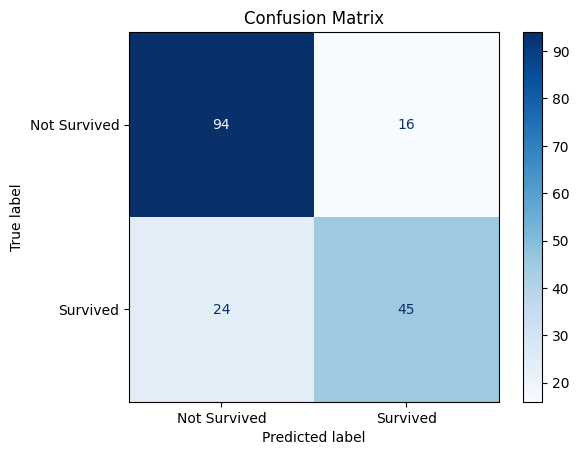

In [14]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()



*   94 samples were correctly identified as Not Survived.

*   45 samples were correctly identified as Survived.


*   16 samples were wrongly classified as Survived but should have been Not Survived.

*   24 samples were wrongly classified as Not Survived but should have been Survived.









# Performance review

The model(LogisticRegression) correctly classified 139 out of 179 samples, resulting in an overall accuracy of about 77.65%. However, it has a notable number of false positives (16) and false negatives (24), indicating room for improvement in distinguishing between the two classes

